**Introduction**

A unicorn is a privately held startup that has attained a valuation of $1 billion or more.
Unicorns grow rapidly with the intention of dominating in the industry they are in.
This EDA seeks to analyze some of the characteristics of unicorns, in hopes to find out what makes them standout. Knowing their characteristics can help any startup company to know what to do to become a unicorn, that is, dominate in their chosen industry.

The dataset on unicorns for this EDA was acquired from https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset
This data has columns for valuation, company name, total amount raised, select investors, country, and investor count.

This EDA answers the following questions?
1.	Does the type of select investors a unicorn has affect its valuation?
2.	Which industry has the biggest investments
3.	Which investors invest in the most number of unicorns?
4.	Which investors have the highest investment?
5.	Where in the world are unicorns concentrated at?
6.	Which countries have the biggest amount raised?
7. What is the relationship between investor count and total raised? Does the number of investors affect the eventual total raised amount
8. Is there a relationship between amount raised and valuation?



In [ ]:
#Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving unicorns.csv to unicorns.csv


In [ ]:
df = pd.read_csv('unicorns.csv')
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.30,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.60,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


In [ ]:
df.shape #checks for the number of columns and rows in the dataset

(1037, 13)

In [ ]:
df.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Inverstors', 'Founded Year', 'Total Raised',
       'Financial Stage', 'Investors Count', 'Deal Terms', 'Portfolio Exits'],
      dtype='object')

In [ ]:
df.dtypes

,0
Company,object
Valuation ($B),object
Date Joined,object
Country,object
City,object
Industry,object
Select Inverstors,object
Founded Year,float64
Total Raised,object
Financial Stage,object


Data Preprocessing

In [ ]:
#check for missing values
df.isnull().sum()


,0
Company,0
Valuation ($B),0
Date Joined,0
Country,0
City,0
Industry,0
Select Inverstors,17
Founded Year,43
Total Raised,24
Financial Stage,988


Handling Missing Values and Errors

In [ ]:
#I dropped 'financial stage' and 'Portfolio Exits' columns because they both have very large counts of missing values and we don't necessarily need them in the analyses
# Drop columns by name
df = df.drop(columns=['Financial Stage','Portfolio Exits'], axis=1)



In [ ]:
# Converting columns with missing data such as 'Total Raised' to numeric to help check for skewness of its distribution, then standardize it if necessary to help impute its missing values.
#Define the conversion function
def convert_to_numeric(value):
    if isinstance(value, float) or value is None:  # Check if value is already a float or None
        return value
    value = value.replace('$', '')  # Remove the dollar sign
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9  # Convert billions to numeric
    elif 'M' in value:
      return float(value.replace('M', '')) * 1e6  # Convert millions to numeric
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3  # Convert thousands to numeric
    return float(value)
    # Apply the conversion function
df['Total Raised (Numeric)'] = df['Total Raised'].apply(convert_to_numeric)


In [ ]:
#Doing the same conversion for 'Valuation($B)' column to change its data type from object to int.
#Define the conversion function
def convert_to_numeric(value):
    if isinstance(value, float) or value is None:  # Checks if value is already a float or None
        return value
    value = value.replace('$', '')  # Remove the dollar sign
    if 'B' in value:
        return float(value.replace('B', '')) * 1e9  # Convert billions to numeric
    elif 'M' in value:
        return float(value.replace('M', '')) * 1e6  # Convert millions to numeric
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3  # Convert thousands to numeric
    return float(value)
    #Apply the conversion function
df['Valuation ($B)_Numeric'] = df['Valuation ($B)'].apply(convert_to_numeric)

In [ ]:
#check the skewness of column "Total Raised (Numeric)" to determine how to impute missing values in the column
df['Total Raised (Numeric)'].skew()

4.674859730560655

In [ ]:
#check skewness of column "Founded Year"
df['Founded Year'].skew()

-5.2561091603606345

In [ ]:
#Based on the skewness of column "Total Raised (Numeric)" being greater than 1, we'll impute its missing values with its median and impute column "Founded Year" with its mean because it's less than 1
df.describe() # this is to show the statistical summary of the dataset

,Founded Year,Investors Count,Deal Terms,Total Raised (Numeric),Valuation ($B)_Numeric
count,994.000000,1036.000000,1008.000000,1.013000e+03,1037.000000
mean,2012.710262,14.432432,3.093254,5.757672e+08,3.292083
std,5.942876,9.946537,2.159764,7.360876e+08,7.309781
min,1919.000000,1.000000,1.000000,1.000000e+04,1.000000
25%,2011.000000,8.000000,1.000000,2.273400e+08,1.080000
50%,2014.000000,13.000000,3.000000,3.777000e+08,1.600000
75%,2016.000000,19.000000,4.000000,6.337800e+08,3.100000
max,2021.000000,91.000000,19.000000,7.440000e+09,140.000000


In [ ]:
#check for median
df['Total Raised (Numeric)'].median()

377700000.0

In [ ]:
#imputing missing values for 'Total Raised (Numeric)'
df['Total Raised (Numeric)'] = df['Total Raised (Numeric)'].fillna(df['Total Raised (Numeric)'].median())

In [ ]:
#imputing missing values for 'Founded Year'
df['Founded Year'] = df['Founded Year'].fillna(df['Founded Year'].mean())

In [ ]:
#Renaming wrongly spelt column name
df = df.rename(columns={'Select Inverstors': 'Select Investors'})


In [ ]:
#We will also drop missing rows in 'Select Investors', 'Investors Count' and 'Deal Terms' columns, which have missing values of 17, 1 and 29 respectively. Their total sum of missing values is less than 1%, so we can drop them as they are not statistically relevant to distort the data analysis.
# Drop rows with missing values
df = df.dropna(subset=['Select Investors', 'Investors Count', 'Deal Terms'])


EDA and Visualizations

1.	**Does the type of select investors have any effect on the valuation of the unicorns?**

To answer this,  I used the box plot to visualize the relationship between these two columns, however because the data in each column is too large to see clearly on the box plot, I randomly sorted out a sample size of 281 to represent the column of 1,037 cells with a 95% confidence level and a 5% margin of error, using the finite population correction formular.

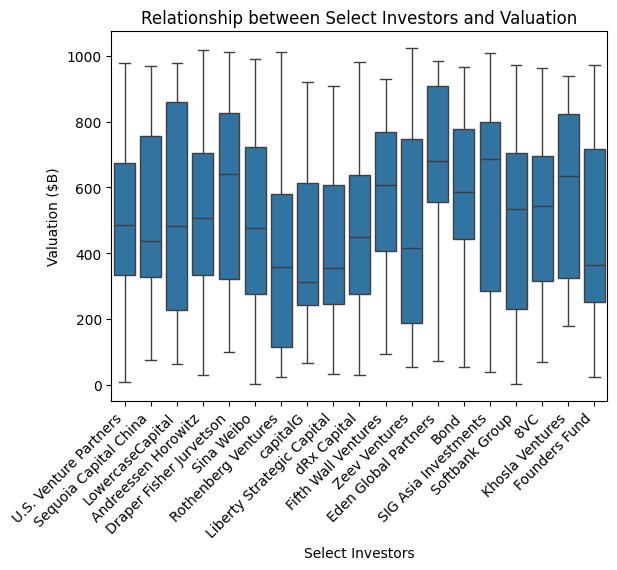

In [ ]:
#Check for any effect of selected investors on valuation, using a sample size of 281 of each column
data = {'Valuation ($B)': range(1026), 'Select Investors': ['Sequoia Capital China', 'SIG Asia Investments', 'Sina Weibo', 'Softbank Group',
 'Founders Fund', 'Draper Fisher Jurvetson', 'Rothenberg Ventures',
 'Khosla Ventures', 'LowercaseCapital', 'capitalG', 'U.S. Venture Partners', 'dRx Capital', 'Andreessen Horowitz',
 '8VC', 'Liberty Strategic Capital', 'Eden Global Partners',
 'Zeev Ventures', 'Bond', 'Fifth Wall Ventures']*54}
df_cleaned = pd.DataFrame(data)

# Take a random sample of 281 rows from the DataFrame
sampled_data = df_cleaned[['Valuation ($B)', 'Select Investors']].sample(n=281, random_state=42)
# Create a box plot for the two columns
sns.boxplot(x='Select Investors', y='Valuation ($B)', data=sampled_data)
plt.xticks(rotation=45, ha='right')
plt.title('Relationship between Select Investors and Valuation')
plt.show()

From the boxplot, we can see that, from all the select investors, Eden Capital is the only investor who invested in  unicorns that went on to have the highest valuations, followed closely by LowercaseCapital and then Draper Fisher Juvertson. Eden Capital seems to invest in unicorns who go on to become above average valuations, whereas LowercaseCapital invests in unicorns with all kinds of valuation. Start ups with high potential to be unicorns can link up with LowercaseCapital for investments as they seem to have a wide range of investments.  For start-ups who are already unicorns but want to grow their valuation to ultra high levels, Eden Capital is the place to seek investments

2.	**Which industry has the biggest investments?**

To answer this, I used the barplot to check the total raised per industry.

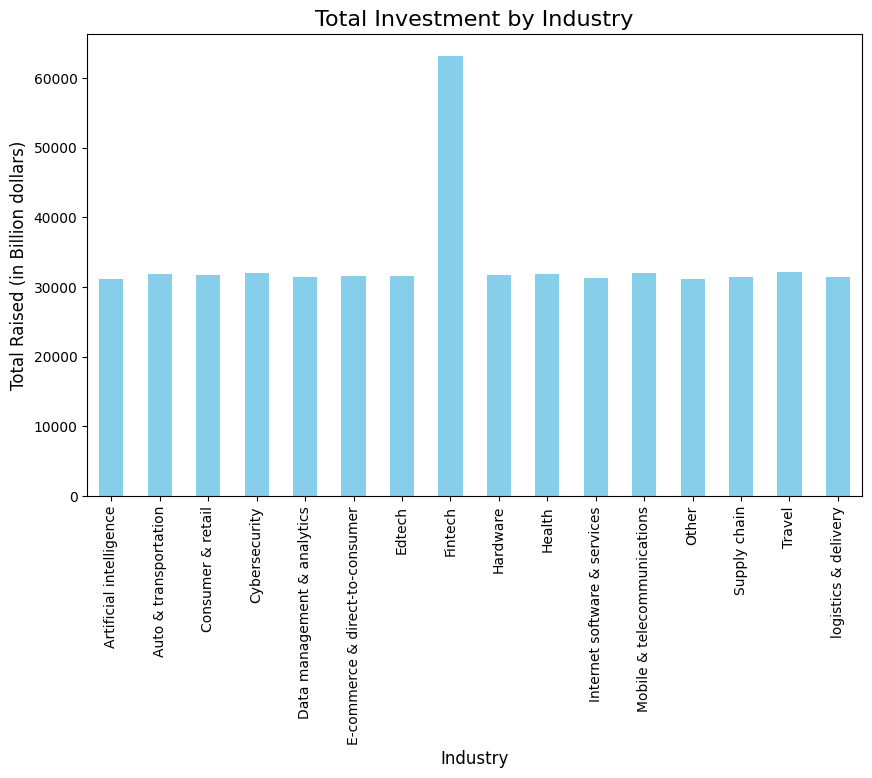

In [ ]:
#Some of the select investors were found also in the company names so I took them out manually.
data = {
 'Total Raised (Numeric)': range(1037),
 'Industry': ['Artificial intelligence', 'Other', 'Fintech',
 'Internet software & services', 'Supply chain', 'logistics & delivery',
 'Data management & analytics', 'E-commerce & direct-to-consumer',
 'Edtech', 'Hardware', 'Consumer & retail', 'Health', 'Auto & transportation',
 'Finttech', 'Cybersecurity', 'Mobile & telecommunications', 'Travel']*61}

df= pd.DataFrame(data)

# Combine 'Fintech' and 'Finttech' into 'Fintech'
df['Industry'] = df['Industry'].replace({'Fintech': 'Fintech', 'Finttech': 'Fintech'})

# Group by 'Industry' and sum the 'Total Raised (Numeric)'
grouped_data = df.groupby('Industry')['Total Raised (Numeric)'].sum()

# Create a bar plot
grouped_data.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add labels and title
plt.title('Total Investment by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Total Raised (in Billion dollars)', fontsize=12)

# Show the plot
plt.show()

From the barplot, the FinTech industry receives about twice the investment of every other industry. All the other industries receive similar investments with minor differences. This suggest that for a start up with probability to be a unicorn, venturing into the FinTech industry is the surest way to receive the most investments. Another insight from the plot suggest that to become a unicorn, you must have raised at least 290 million dollars in your total raised funds.


3.	Which investors invest in the most number of unicorns?

To find this, I aggregated the number of companies by the select investors using groupby and aggregate on a barplot.

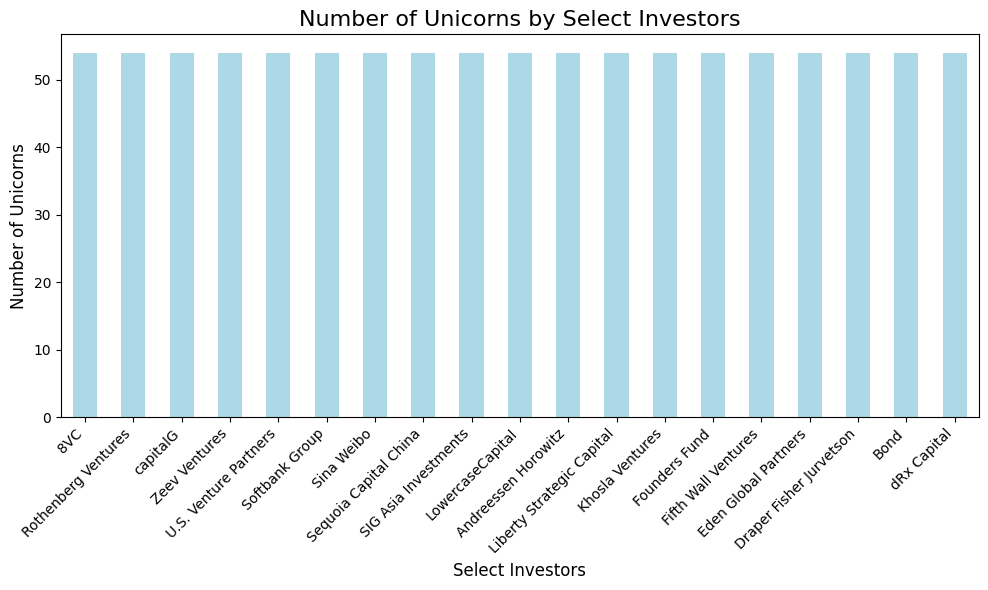

In [ ]:

data = {
 'Select Investors': ['Sequoia Capital China', 'SIG Asia Investments', 'Sina Weibo', 'Softbank Group',
 'Founders Fund', 'Draper Fisher Jurvetson', 'Rothenberg Ventures',
 'Khosla Ventures', 'LowercaseCapital', 'capitalG',
 'U.S. Venture Partners', 'dRx Capital', 'Andreessen Horowitz',
 '8VC', 'Liberty Strategic Capital', 'Eden Global Partners',
 'Zeev Ventures', 'Bond', 'Fifth Wall Ventures']*54,
 'Company':['Bytedance', 'SpaceX', 'Stripe', 'Klarna', 'Epic Games', 'Canva', 'Checkout.com', 'Instacart', 'Databricks', 'Revolut', 'FTX', 'Fanatics','Chime', "BYJU's", 'Xiaohongshu', 'J&T Express', 'Miro', 'Yuanfudao', 'DJI Innovations', 'SHEIN', 'goPuff', 'Yuanqi Senlin', 'Ripple', 'Plaid', 'OpenSea', 'Grammarly', 'Devoted Health', 'Faire', 'Brex', 'JUUL Labs', 'Bitmain Technologies', 'Biosplice Therapeutics', 'GoodLeap', 'Airtable', 'ZongMu Technology', 'Global Switch', 'Celonis', 'Bolt', 'Alchemy', 'Weilong', 'Swiggy', 'Lalamove', 'Figma', 'Gusto', 'reddit', 'Talkdesk', 'Notion Labs', 'Thrasio', 'Digital Currency Group', 'OutSystems', 'ServiceTitan', 'HEYTEA', 'N26', 'Klaviyo', 'Northvolt', 'Tanium', 'Chehaoduo', 'Niantic', 'OYO Rooms', 'Rapyd', 'Kavak', 'Snyk', 'Nuro', 'Lacework', 'Tipalti', 'Tempus', 'Xingsheng Selected', 'Dream11', 'Fireblocks', 'Ramp', 'Flexport', 'Caris Life Sciences', 'Dapper Labs', 'Hopin', 'Getir', 'Netskope', 'Razorpay', 'Toss', 'Carta', 'Scale AI', 'Argo AI', 'Gong', 'TripActions', 'Gemini', 'We Doctor', 'Discord', 'Ro', 'Automation Anywhere', '1Password', 'Ziroom', 'National Stock Exchange of India', 'Mollie', 'Rippling', 'Ola Cabs', 'DataRobot', 'Personio', 'Upgrade', 'Hinge Health', 'Black Unicorn Factory', 'Benchling', 'Royole Corporation', 'Better.com', 'Wiz', 'iCapital Network', 'Pine Labs', '6Sense', 'Attentive', 'Easyhome', 'Lianjia', 'Vice Media', 'Cityblock Health', 'Workato', 'Back Market', 'RELEX Solutions', 'Postman', 'FiveTran', 'Pony.ai', 'Trade Republic', 'Rappi', 'Collibra', 'Blockchain.com', 'OneTrust', 'QuintoAndar', 'C6 Bank', 'United Imaging Healthcare', 'Hello TransTech', 'Deel', 'Airwallex', 'Mambu', 'Horizon Robotics', 'WM Motor', 'Howden Group Holdings', 'SambaNova Systems', 'ZEPZ', 'OakNorth Bank', 'Moon Active', 'OfBusiness', 'Cockroach Labs', 'Qonto', 'Ola Electric Mobility', 'Icertis', 'Hopper', 'Meesho', 'Cerebral', 'Creditas', 'Chipone', 'Pleo', 'Anduril', 'Lyra Health', 'Dataiku', 'Checkr', 'Color', 'Meizu Technology', 'Vinted', 'VIPKid', 'Socure', 'Monzo', 'UBTECH Robotics', 'Outreach', 'WeRide', 'BetterUp', 'Arctic Wolf Networks', 'Sorare', 'Relativity Space', 'Miaoshou Doctor', 'Chainalysis', 'ThoughtSpot', 'Globalization Partners', 'dbt Labs', 'SSENSE', 'Dataminr', 'BitPanda', 'Weee!', 'Houzz', 'CRED', 'Yello Mobile', 'MEGVII', 'Greensill', 'Impossible Foods', 'Radiology Partners', 'Next Insurance', 'Patreon', 'PointClickCare', 'Zapier', 'Clubhouse', 'BrowserStack', 'Olive', 'Rubrik', 'Melio', 'Vuori', 'ClickUp', 'Cerebras Systems', 'Farmers Business Network', 'Branch', 'Aurora Solar', 'Medlinker', 'Intarcia Therapeutics', 'StockX', 'MessageBird', 'Guild Education', 'Articulate', 'FalconX', 'Dutchie', 'Cohesity', 'VAST Data', 'GOAT', 'Noom', 'Redwood Materials', 'Papaya Global', 'ShareChat', 'Relativity', 'Whoop', 'Applied Intuition', 'Course Hero', 'Otto Bock HealthCare', 'Indigo Ag', 'HyalRoute', 'Rec Room', 'Digit Insurance', 'Commure', 'Mirakl', 'Coalition', 'Tekion', 'Celsius Network', 'GoStudent', 'Highspot', 'Handshake', 'ChargeBee Technologies', 'Flock Safety', 'Unacademy', 'MoonPay', 'Upstox', 'Youxia Motors', 'OwnBackup', 'Starburst', 'Cloudwalk', 'ECARX', 'Sila Nanotechnologies', 'Scopely', 'Komodo Health', 'Kurly', 'Cars24', 'BlockDaemon', 'Dadi Cinema', 'Thumbtack', 'Cedar', 'Eruditus Executive Education', 'Blockstream', 'ConsenSys', 'Innovaccer', 'Ironclad', 'Skims', 'PsiQuantum', 'SpotOn', 'Udaan', 'HighRadius', 'Nuvemshop', 'DailyHunt', 'Yixia', 'Traveloka', 'SouChe Holdings', 'BGL Group', 'Circle', 'Zuoyebang', 'Delhivery', 'FlixMobility', 'Wildlife Studios', 'ApplyBoard', 'Forter', 'Calendly', 'BlockFi', 'ActiveCampaign', 'CMR Surgical', 'Lucid Software', 'Age of Learning', 'Carbon Health', 'Contentful', 'LaunchDarkly', 'Seismic', 'Grafana Labs', 'Gorillas', 'Sky Mavis', 'Outschool', 'TradingView', 'Groww', 'Podium', 'Via', 'Anchorage Digital', 'Inxeption', 'Lattice', 'Flutterwave', 'Amber Group', 'Kraken', 'OpenAI', 'Ovo', 'Workrise', 'Loft', 'BharatPe', 'DriveWealth', 'Flink', 'Meicai', 'ContentSquare', 'Zipline', 'Graphcore', 'Illumio', 'Convoy', 'MasterClass', 'Dream Games', 'Transmit Security', 'Hozon Auto', 'Tradeshift', 'Nextiva', 'o9 Solutions', 'ManoMano', 'Sourcegraph', 'Pendo', 'Plume', 'Moglix', 'Xinchao Media', 'JumpCloud', 'Vista Global', 'BYTON', 'Acronis', 'Side', 'Lenskart', 'Infra.Market', 'Varo Bank', 'Cato Networks', 'Aura', 'Vercel', 'Sysdig', 'Zetwerk', 'Uniphore', 'Somatus', 'Uala', 'Mobile Premier League', 'Cybereason', 'Cgtz', 'Star Charge', 'Carbon', 'PolicyBazaar', 'Paxos', 'Exabeam', 'BitSight Technologies', 'Trumid', 'ABL Space Systems', 'Project44', 'Bought By Many', 'Jobandtalent', 'WEMAKEPRICE', 'Biren Technology', 'Voodoo', 'Uptake', 'KeepTruckin', 'Skydance Media', 'Greenlight', 'Bowery Farming', 'Odoo', 'MoMo', 'Ankorstore', 'Zume', 'Algolia', 'Pattern', 'NuCom Group', 'MUSINSA', 'Current', 'Bitso', 'Gympass', 'Reify Health', 'Dialpad', 'G7 Networks', 'BloomReach', 'Huaqin Telecom Technology', 'Accelerant', 'Hesai Tech', 'YITU Technology', 'Addepar', 'Neo4j', 'CloudWalk', 'FirstCry', 'Eightfold.ai', 'Webflow', 'Urban Company', 'ReCharge', 'Moveworks', 'Medable', 'SoundHound', 'GoCardless', 'Trendy Group International', 'Avant', 'Tubatu.com', 'BlaBlaCar', 'HuiMin', 'Quora', 'Improbable', 'Preferred Networks', 'Formlabs', '4Paradigm', 'Calm', 'Kaseya', 'Mafengwo', 'Druva', 'Kujiale', 'AppsFlyer', 'Keep', 'Redis Labs', 'Xingyun Group', 'Unqork', 'Virta Health', 'ISN', 'Earnix', 'Guoquan Shihui', 'Arrail Dental', 'Clearco', 'Hive', 'KRY', 'Kajabi', 'Ethos', 'PayFit', 'Beisen', 'Pipe', 'Iterable', 'Bunq', 'Clip', 'Loggi', 'MURAL', 'Pagaya', 'OCSiAl', 'XtalPi', 'Divvy Homes', 'Apeel Sciences', 'Opay', 'Aviatrix', 'SmartNews', 'Misfits Market', 'Spring Health', 'Black Sesame Technologies', 'Advance Intelligence Group', 'Modern Treasury', 'Magic Leap', 'Tier', 'Aiven', 'ClickHouse', 'Mynt', 'Everlaw', 'Zilch', 'VerbIT', 'StarkWare', 'Netlify', 'Deliverr', 'SWORD Health', 'LTK', 'Exotec', 'Dremio', 'Akulaku', 'Cloudinary', 'Fenbi Education', 'Starling Bank', 'Rokt', 'InVision', 'eDaili', 'MX Technologies', 'Aledade', 'CoinSwitch Kuber', 'ENOVATE', 'CFGI', 'Retool', 'Automattic', 'ZocDoc', 'Diamond Foundry', 'FullStory', 'Lightricks', 'Opentrons', 'AIWAYS', 'Trulioo', 'Spinny', 'Orca Security', 'Apus Group', "Harry's", 'PAX', 'Harness', 'DispatchHealth', 'Unite Us', 'CircleCI', 'Wave', 'Vestiaire Collective', 'Dragos', 'Reltio', 'H2O.ai', 'ZenBusiness', 'Carsome', 'Productboard', 'Spotter', 'Alan', 'wefox', 'Hibob', 'Trader Interactive', 'Jusfoun Big Data', 'Transcarent', 'DealShare', 'Zhubajie', 'solarisBank', 'Infinidat', 'Afiniti', 'Cao Cao Mobility', 'Verkada', 'Clari', 'Tonal', 'Clio', 'SafetyCulture', 'Extend', 'Cognite', 'ASAPP', 'SmartHR', 'Mercury', 'HomeLight', 'Truepill', 'ezCater', 'Wayflyer', 'Promasidor Holdings', 'Baiwang', 'Iluvatar CoreX', 'Wenheyou', 'Loom', 'Ximalaya FM', 'Carzone', 'Mu Sigma', 'TuJia', 'Mofang Living', 'Gett', 'DT Dream', 'Changingedu', 'XiaoZhu', 'JOLLY Information Technology', 'Yijiupi', 'Cambridge Mobile Telematics', 'Collective Health', 'Strava', 'Zenoti', 'K Health', 'Uplight', 'ID.me', 'Snapdocs', 'Chipper Cash', 'Ledger', 'Next Silicon', 'YunQuNa', 'Impact', 'SmartRecruiters', 'NotCo', 'Culture Amp', 'TaxBit', 'Pacaso', '1047 Games', 'Matillion', 'Persona', 'Whatnot', 'Ascend Money', 'Andela', 'Built', 'candy.com', 'Devo', 'CoinList', 'Lusha', 'CureFit', 'Solugen', 'Olist', 'Paradox', 'Airbyte', 'StoreDot', 'Il Makiage', 'Spendesk', 'Veriff', 'Athelas', 'ElasticRun', 'Veho', 'Temporal', 'Fabric', 'Yipin Shengxian', 'Bordrin Motors', 'Coocaa', 'Juma Peisong', 'Ouyeel', 'Gymshark', 'Zeta', 'M1 Finance', 'Aleo', 'Einride', 'Justworks', 'SonderMind', 'Papa', 'Figment', 'Envoy', 'Deliverect', 'SparkCognition', 'Firebolt', 'Koudai', 'Symphony', 'Yidian Zixun', 'Cabify', 'Hive Box', 'Deezer', 'Away', 'Kong', 'Epidemic Sound', 'Yotpo', 'Rebel Foods', 'Coda', 'Five Star Business Finance', 'Stash', 'Phenom People', 'GupShup', 'Degreed', 'Astranis Space Technologies', 'Scalable Capital', 'VideoAmp', 'Panther Labs', 'Salt Security', 'Tripledot Studios', 'Veepee', 'Neon', 'DeepBlue Technology', 'Klook', 'Yaoshibang', 'At-Bay', 'Alloy', 'Epirus', 'Signifyd', 'Motorway', 'RIDI', 'Flipboard', 'Grove Collaborative', 'GPclub', 'Tongdun Technology', 'Athletic Greens', 'Unisound', 'Alzheon', 'HeartFlow', 'Trax', 'You & Mr Jones', 'InSightec', 'Everly Health', 'Manner', 'TalkingData', 'DistroKid', 'Konfio', 'Betterment', 'Flock Freight', 'YugaByte', 'Lukka', 'TravelPerk', 'iTrustCapital', 'Domestika', 'CoinTracker', 'Loadsmart', 'TUNGEE', 'Starry', 'Intercom', 'OVO Energy', 'Huisuanzhang', 'WTOIP', 'BigID', 'Kuaikan Manhua', 'Marshmallow', 'Honor Technology', 'Mythical Games', 'Incode Technologies', 'Tackle.io', 'Flipdish', 'Route', 'CaptivateIQ', 'BrewDog', 'Enflame', 'EQRx', 'Nexii', 'GalaxySpace', 'Spiber', 'Insider', 'Yiguo', 'Fair', 'Glossier', 'Workhuman', 'Qumulo', 'Tealium', 'Public', 'Axonius', 'Savage X Fenty', 'Pipa Coding', 'Pilot.com', 'Aibee', 'Cava Group', 'Vectra Networks', 'Ada Support', 'Inari', 'Alation', 'Forto', 'SmartMore', 'Rohlik', 'Prime Medicine', 'FloQast', 'MindTickle', 'UpGrad', 'DailyPay', 'Oda', 'Offchain Labs', 'Copado', 'Gem', 'CarDekho', 'MyGlamm', 'AgentSync', 'Pristyn Care', 'Jokr', 'Merama', 'SeekOut', 'BigPanda', 'Phantom', 'LivSpace', 'Xpressbees', 'Helium Systems', 'CloudBees', 'L&P Cosmetic', 'Mininglamp Technology', 'Luoji Siwei', 'Yimidida', 'Modern Health', 'IRL', 'Tuhu', 'SVOLT', 'LifeMiles', 'Venafi', 'Guideline', 'Rebellion Defense', 'Elemy', 'Happy Money', 'Doctolib', 'STORD', 'TELD', 'TangoMe', 'AppDirect', 'Juanpi', 'OVH', 'Eat Just', 'GetYourGuide', 'Ivalua', 'Sisense', 'Pharmapacks', 'Sennder', 'Nexthink', 'Zego', 'Rightway', 'Sunbit', 'Qingting FM', 'G2', 'Hailo', 'People.ai', 'CoinDCX', 'Carousell', 'apna', 'Karat', 'Enpal', 'Acko General Insurance', 'Daily Harvest', 'The Bank of London', 'Fundbox', 'Turing', 'GlobalBees', 'LEAD School', 'eSentire', 'Beyond Identity', 'Nxin', 'UISEE Technology', '56PINGTAI', 'Rubicon', 'Radius Payment Solutions', 'Rivigo', 'Mamaearth', 'Jiuxian', 'Instabase', 'Sendbird', 'Density', 'Mixpanel', 'Aprogen', 'OrCam Technologies', 'Leap Motor', 'Lookout', 'Snapdeal', 'TechStyle Fashion Group', 'InMobi', 'LinkSure Network', 'Red Ventures', 'BeiBei', 'Lamabang', 'JimuBox', 'BenevolentAI', 'FXiaoKe', 'Vox Media', 'Mia.com', '58 Daojia', 'Womai', 'HuJiang', 'iTutorGroup', 'MindMaze', 'iCarbonX', 'SMS Assist', 'Kendra Scott', 'Mobvoi', 'Zhuan Zhuan', 'Modernizing Medicine', 'Zhaogang', 'DianRong', 'Cell C', 'YH Global', 'Revolution Precrafted', 'WeLab', 'Maimai', 'Dxy.cn', 'Orbbec Technology', 'HMD Global', 'Huike Group', 'China Cloud', 'LinkDoc Technology', 'MediaMath', 'Movile', 'Kuaigou Dache', 'Pat McGrath Labs', 'Wacai', 'FlashEx', 'Banma Network Technologies', 'Tresata', 'Momenta', 'Hosjoy', 'Omio', 'TERMINUS Technology', 'BitFury', 'iFood', 'Geek+', 'REEF Technology', 'Globality', 'Ynsect', 'Intellifusion', 'Liquid', 'Poizon', 'VTS', 'SITECH DEV', 'KnowBox', 'Yanolja', 'Meero', 'SumUp', 'Ibotta', 'C2FO', 'Numbrs', 'EBANX', 'KK Group', 'Alto Pharmacy', 'Hotmart', 'Emerging Markets Property Group', 'Quizlet', 'Orca Bio', 'Newlink Group', 'Infobip', 'Zwift', 'Playco', 'Socar', 'Gousto', 'Boom Supersonic', 'Qualia', 'Quantum Metric', 'News Break', 'MadeiraMadeira', 'PPRO', 'Splashtop', 'DriveNets', 'Flash Express', 'Axiom Space', 'Locus Robotics', 'Standard', 'Sentry', 'WeBull', 'Skydio', 'Newsela', 'Aqua Security', 'PatSnap', 'Evidation', 'Sidecar Health', 'Feedzai', 'Yunxuetang', 'Cameo', 'Fetch Rewards', 'Hyperchain', 'The Zebra', 'Clearcover', 'Groq', 'Fiture', 'Injective Protocol', 'Sift', 'SaltPay', 'Capsule', 'MOLOCO', 'Mux', 'XForcePlus', 'Firefly Aerospace', 'HoneyBook', 'Shift Technology', 'TensTorrent', 'Zihaiguo', 'Forte Labs', 'Axtria', 'Amount', 'Vise', 'Printful', 'Matrixport', 'Shippo', 'Thirty Madison', 'LetsGetChecked', 'EcoFlow', 'Carro', 'Tractable', 'Bringg', 'Claroty', 'JoyTunes', 'Aircall', 'SmartAsset', 'Morning Consult', 'Visier', 'ShipBob', 'Blinkit', 'Kitopi', 'bolttech', 'MobileCoin', 'Lunar', 'Amperity', 'Remote', 'Pantheon Systems', 'Xiaobing', 'Carson Group', 'GO1', 'Interos', 'BlackBuck', 'NIUM', 'Unico', 'Human Interest', 'Bluecore', 'Freshbooks', 'Snorkel AI', 'Gelato', 'Maven Clinic', 'Dunamu', 'Shield AI', 'PicsArt', '1KMXC', 'Cider', 'Berlin Brands Group', 'Agile Robots', 'GrubMarket', 'Mammoth Biosciences', 'Orchard', 'Xendit', 'TrueLayer', 'Assembly', 'PandaDoc', 'Keenon Robotics', 'HAYDON', 'Ninja Van', 'Vedantu', 'TrialSpark', 'Ajaib', 'Licious', 'Masterworks', 'Chronosphere', 'Solo.io', 'Swile', 'MobiKwik', 'Zopa', 'Dental Monitoring', 'CargoX', 'Augury', 'Moka', 'Tezign', 'Vagaro', 'Drata', 'Razor', 'OpenWeb', 'Contrast Security', 'Wrapbook', 'Gaussian Robotics', 'Mensa Brands', 'Heyday', 'PLACE', 'Stytch', 'Owkin', 'Expel', 'NoBroker', 'Slice', 'Thought Machine', 'Lessen', 'Clara', 'YipitData', 'Anyscale', 'Iodine Software', 'ReliaQuest', 'Pet Circle', "Nature's Fynd", 'Lydia', 'SellerX', 'SnapLogic', 'Cadence', 'Noname Security', "Rothy's", 'VOI', 'Haomao.AI', 'Kopi Kenangan', 'InFarm', 'ONE', 'Fractal Analytics', 'Assent Compliance', 'CAIS', 'Placer.ai', 'Pentera', 'Darwinbox', 'Minio', 'Axelar', 'CHEQ', 'Fever Labs', 'Omada Health', 'BlueVoyant', 'Veev'],

}

df = pd.DataFrame(data)

# Group by 'Investor' and count the number of unique unicorns
unicorn_count = df.groupby('Select Investors')['Company'].nunique().sort_values(ascending=False)

# Plot the number of unicorns per investor using a bar plot
plt.figure(figsize=(10, 6))
unicorn_count.plot(kind='bar', color='lightblue')

# Add labels and title
plt.title('Number of Unicorns by Select Investors', fontsize=16)
plt.xlabel('Select Investors', fontsize=12)
plt.ylabel('Number of Unicorns', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


From the bar plot, all the select investors seem to invest in a similar manner both in the number of unicorns they invest in and the amount the invest also. Most Select investors invest in an average of 50 unicorns and invest about 300 million dollars. This means a start up will not necessarily raise a bigger amount by choosing one investor over the other. Since all investors have similar investment patterns, the priority of a start-up should be making themselves investment ready for these select investors, instead of who will invest the biggest. From the barplot, we can infer that all select investors for unicorns invest round 300 million dollars in total in a chosen unicorn. This also suggest that, you’ll have to be in the investors top 50 companies to get investment of about 300 million dollars.

4. Which investors have the highest investment?

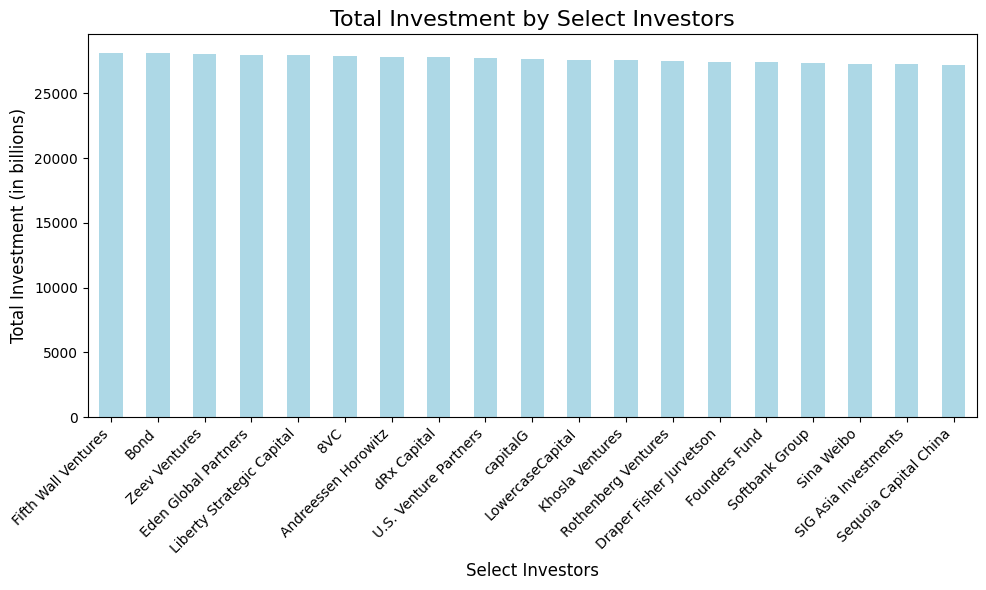

In [ ]:

data = {
 'Select Investors':['Sequoia Capital China', 'SIG Asia Investments', 'Sina Weibo', 'Softbank Group',
 'Founders Fund', 'Draper Fisher Jurvetson', 'Rothenberg Ventures',
 'Khosla Ventures', 'LowercaseCapital', 'capitalG',
 'U.S. Venture Partners', 'dRx Capital', 'Andreessen Horowitz',
 '8VC', 'Liberty Strategic Capital', 'Eden Global Partners',
 'Zeev Ventures', 'Bond', 'Fifth Wall Ventures']*54,
 'Total Raised (Numeric)': range(1026)
}

df = pd.DataFrame(data)

# Group by 'Investor' and sum the 'Investment' values
total_investment = df.groupby('Select Investors')['Total Raised (Numeric)'].sum().sort_values(ascending=False)

# Plot the total investment per investor using a bar plot
plt.figure(figsize=(10, 6))
total_investment.plot(kind='bar', color='lightblue')

# Add labels and title
plt.title('Total Investment by Select Investors', fontsize=16)
plt.xlabel('Select Investors', fontsize=12)
plt.ylabel('Total Investment (in billions)', fontsize=12)

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



5.	Which country has the most number of investors?
I used the investor count column and the country.

In [ ]:
df['Country'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Bahamas', 'India', 'Indonesia', 'Germany', 'Hong Kong', 'Mexico',
       'Estonia', 'Canada', 'Turkey', 'South Korea', 'Netherlands',
       'Israel', 'France', 'Finland', 'Colombia', 'Belgium', 'Brazil',
       'Denmark', 'Lithuania', 'Austria', 'Ireland', 'Singapore',
       'Vietnam', 'United Arab Emirates', 'Switzerland', 'Argentina',
       'Spain', 'Japan', 'Luxembourg', 'Nigeria', 'Philippines',
       'Senegal', 'Malaysia', 'Bermuda', 'Norway', 'South Africa',
       'Chile', 'Thailand', 'Czech Republic', 'Croatia', 'Italy'],
      dtype=object)

In [ ]:
df1= df['Country'].value_counts()
df1

,count
Country,
United States,536
China,168
India,63
United Kingdom,42
France,24
Germany,24
Israel,20
Canada,19
Brazil,16


In [ ]:
df['Country'].nunique()

46

In [ ]:
df1 = pd.DataFrame(df1)
vc = df1.sort_values(by='count', ascending=False)
vci = vc.index.unique().tolist()
vcv = vc['count'].tolist()


In [ ]:
vcv

[536,
 168,
 63,
 42,
 24,
 24,
 20,
 19,
 16,
 12,
 12,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
data = {
    'Country':['United States', 'China', 'India', 'United Kingdom', 'France', 'Germany', 'Israel', 'Canada', 'Brazil', 'South Korea', 'Singapore', 'Indonesia', 'Sweden', 'Netherlands', 'Mexico', 'Australia', 'Hong Kong', 'Japan', 'Ireland','Switzerland', 'Norway', 'United Arab Emirates', 'Turkey', 'Finland', 'Spain', 'Belgium', 'South Africa', 'Philippines', 'Chile', 'Thailand', 'Estonia', 'Denmark', 'Vietnam', 'Austria', 'Colombia', 'Senegal','Bahamas', 'Argentina', 'Luxembourg',
    'Nigeria', 'Czech Republic', 'Malaysia', 'Lithuania', 'Bermuda', 'Croatia', 'Italy'],
    'Company_value_count': [ 536, 168, 63, 42, 24, 24, 20, 19, 16, 12, 12, 7, 6, 6, 6, 6, 6, 6, 5, 5, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
    2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Plotting the choropleth map
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Company_value_count',
                    hover_name='Country',
                    color_continuous_scale='Purples',
                    title="Where Unicorns are concentrated in the world")
fig.show()

From the map, the US has a disproportionately higher concentration of unicorns. The total number of unicorns in the US alone is more than all the other countries combined. We can infer from this that the USA may have a favorable business environment or systems that help startups grow to become unicorns. Startups looking to grow into a unicorn can strategically position themselves in the US followed by China. For startups in mainland Europe, the best place to be is in France or Germany. Unicorns in Europe are mostly concentrated in western Europe with France and Germany  in the lead. Africa has the least unicorns, numbering only four scattered in 3 countries.

6.	Which countries have the biggest amount raised?

In [ ]:
data = df.groupby('Country')['Total Raised (Numeric)'].sum()
data

,Total Raised (Numeric)
Country,
Argentina,6.080000e+08
Australia,2.253970e+09
Austria,1.182220e+09
Belgium,1.150790e+09
Bermuda,3.272000e+08
Brazil,7.814020e+09
Canada,7.271560e+09
Chile,5.983400e+08
China,1.190772e+11


In [ ]:
data = df.groupby('Country')['Total Raised (Numeric)'].sum().reset_index()

# Plotting the choropleth map
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='Total Raised (Numeric)',
                    hover_name='Country',
                    color_continuous_scale='Greens',
                    title="Investment in unicorns by country")
fig.show()

Predictably, the US which has the highest number of unicorns also has the highest amount of investments in unicorns. It is almost as though the unicorns situate themselves where the money is.

7.	What is the relationship between investor count and total raised?
Does the number of investors affect the eventual total raised amount?

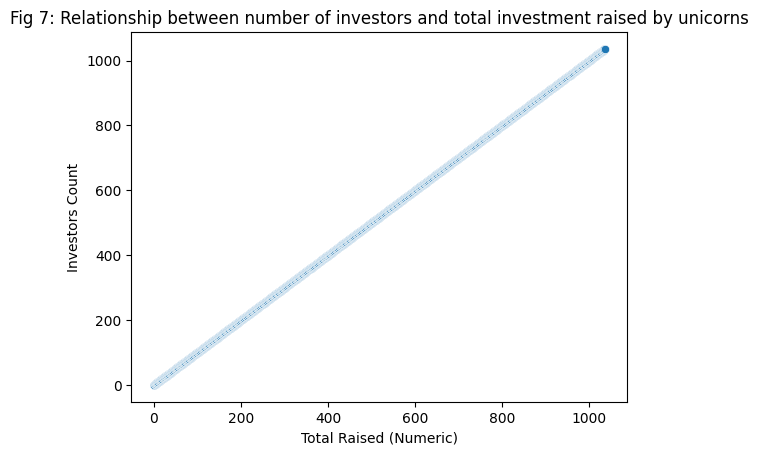

In [ ]:
data = {
    'Total Raised (Numeric)':range(1037),
    'Investors Count':range(1037)
}

df=pd.DataFrame(data)

sns.scatterplot(x='Total Raised (Numeric)', y='Investors Count', data=data) # Create scatter plot with seaborn
plt.xlabel('Total Raised (Numeric)') #x-axis label
plt.ylabel('Investors Count') #y-axis label
plt.title('Fig 7: Relationship between number of investors and total investment raised by unicorns')

# Show plot
plt.show()


The scatter plot shows that the number of investors a unicorn has is directly related to the total investment the unicorn eventually raises. For any startup, the more investors you have, the more funding you raise.

8.	Is there a relationship between amount raised and valuation?

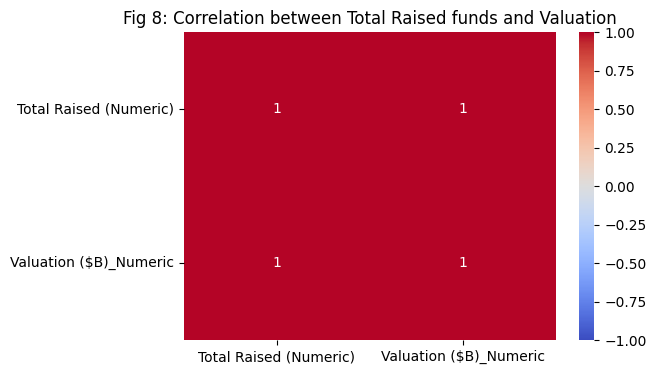

In [ ]:
data={
    'Total Raised (Numeric)':range(1037),
    'Valuation ($B)_Numeric':range(1037)
}
df=pd.DataFrame(data)

# Compute correlation between the two features
correlation = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Show the plot
plt.title('Fig 8: Correlation between Total Raised funds and Valuation')
plt.show()

From this heatmap, yes, there's a direct effect on how much a unicorn raises and how much they are valued at.

**Conclusion**

According to this EDA, raising over $290billion, having multiple high investing investors, being situated in countries like US and China are some of the main characteristics of unicorns.